In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as skl
import xgboost as xgb
import catboost
import numpy 

#  Loading the Data

In [2]:
dataset = pd.read_csv("Datasets\crop_yield.csv")

In [3]:
dataset.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [4]:
dataset.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
dataset.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


### Encode Categorical Features

In [7]:

from sklearn.preprocessing import LabelEncoder


categorical_cols = dataset.select_dtypes(include=['object']).columns


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


In [8]:
for col, le in label_encoders.items():
    print(f"Column: {col}")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_label} --> {encoded_value}")
    print("-" * 30)


Column: Crop
  Arecanut --> 0
  Arhar/Tur --> 1
  Bajra --> 2
  Banana --> 3
  Barley --> 4
  Black pepper --> 5
  Cardamom --> 6
  Cashewnut --> 7
  Castor seed --> 8
  Coconut  --> 9
  Coriander --> 10
  Cotton(lint) --> 11
  Cowpea(Lobia) --> 12
  Dry chillies --> 13
  Garlic --> 14
  Ginger --> 15
  Gram --> 16
  Groundnut --> 17
  Guar seed --> 18
  Horse-gram --> 19
  Jowar --> 20
  Jute --> 21
  Khesari --> 22
  Linseed --> 23
  Maize --> 24
  Masoor --> 25
  Mesta --> 26
  Moong(Green Gram) --> 27
  Moth --> 28
  Niger seed --> 29
  Oilseeds total --> 30
  Onion --> 31
  Other  Rabi pulses --> 32
  Other Cereals --> 33
  Other Kharif pulses --> 34
  Other Summer Pulses --> 35
  Peas & beans (Pulses) --> 36
  Potato --> 37
  Ragi --> 38
  Rapeseed &Mustard --> 39
  Rice --> 40
  Safflower --> 41
  Sannhamp --> 42
  Sesamum --> 43
  Small millets --> 44
  Soyabean --> 45
  Sugarcane --> 46
  Sunflower --> 47
  Sweet potato --> 48
  Tapioca --> 49
  Tobacco --> 50
  Turmeric --> 5

In [9]:
dataset.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


#  Feature and Target Separation

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB


In [11]:
X = dataset.iloc[:, :9]
Y = dataset["Yield"]
Y = pd.DataFrame(Y)

In [12]:
X

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09
...,...,...,...,...,...,...,...,...,...
19684,44,1998,1,19,4000.0,2000,1498.0,395200.00,1160.00
19685,53,1998,2,19,1000.0,3000,1498.0,98800.00,290.00
19686,24,1997,1,10,310883.0,440900,1356.2,29586735.11,96373.73
19687,40,1997,1,10,275746.0,5488,1356.2,26242746.82,85481.26


In [13]:
Y

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909
...,...
19684,0.500000
19685,3.000000
19686,1.285000
19687,0.016667


#  Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# added scaled data to a dataframe
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

#  Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 42, test_size = 0.2)

In [16]:
x_train


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
19466,-0.794171,0.288156,-0.848586,-0.925400,-0.245042,-0.062478,2.329130,-0.253240,-0.228479
17802,-1.629621,-0.327425,-0.848586,-1.036508,-0.245427,-0.062481,-0.930672,-0.253764,-0.228976
7014,-0.087251,-1.558585,1.605437,1.407873,-0.245251,-0.062482,-0.678618,-0.253642,-0.228774
14078,-1.629621,0.749841,-0.030578,1.518982,-0.216799,-0.062388,-0.184058,-0.220394,-0.196456
8121,-1.179763,-1.096900,-0.848586,-0.036534,0.508271,-0.061040,-0.779733,0.296931,0.418460
...,...,...,...,...,...,...,...,...,...
11284,0.683935,-0.019635,0.787429,1.407873,-0.211831,-0.062248,-1.042927,-0.213341,-0.209348
11964,-0.344313,0.134261,-0.030578,1.630090,-0.222019,-0.062161,-0.418362,-0.223727,-0.209645
5390,0.105546,1.211526,-0.030578,1.074549,-0.222989,-0.061898,-0.571504,-0.226479,-0.199602
860,-1.372560,-1.250795,-0.848586,-0.258750,-0.215782,-0.062421,-0.532331,-0.230421,-0.202458


In [17]:
x_test

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
18238,0.426873,1.057631,-0.848586,-0.480967,-0.245243,-0.062478,-0.654869,-0.253531,-0.228687
6918,-0.344313,-1.558585,-0.030578,0.630116,-0.234244,-0.062443,0.056978,-0.244625,-0.218563
4894,0.491138,1.057631,2.423445,0.296791,-0.236877,-0.062315,2.937174,-0.243635,-0.218626
10960,0.555404,-0.173530,-1.666594,-0.369859,-0.204907,-0.062379,-0.174510,-0.209021,-0.216470
15615,-1.372560,1.211526,-0.848586,-0.036534,-0.233316,-0.062463,-0.780712,-0.239028,-0.213086
...,...,...,...,...,...,...,...,...,...
8087,0.105546,-1.096900,1.605437,-0.258750,-0.088634,-0.060445,-0.706284,-0.139226,-0.094263
14720,-0.601374,0.903736,-1.666594,1.630090,-0.245495,-0.062482,0.341839,-0.253828,-0.228993
9234,-0.794171,-0.789110,1.605437,1.630090,-0.182120,-0.062210,0.214405,-0.200846,-0.183280
19610,0.555404,1.057631,2.423445,0.630116,-0.201020,-0.062391,0.027843,-0.201222,-0.175507


In [18]:
y_train

,Yield
19466,2.860000
17802,2.610000
7014,0.447273
14078,1.170769
8121,0.535789
...,...
11284,2.130000
11964,3.234545
5390,9.684074
860,0.704000


In [19]:
y_test

,Yield
18238,3.820000
6918,1.395357
4894,6.522727
10960,0.812857
15615,0.508000
...,...
8087,7.043600
14720,0.360000
9234,1.383333
19610,0.702727


#  Visualize Correlations

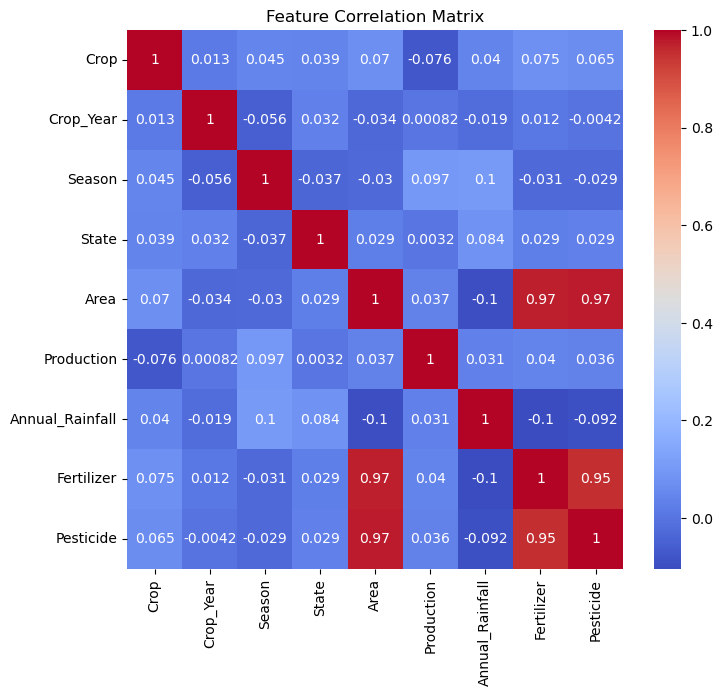

In [20]:
plt.figure(figsize=(8, 7))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [21]:

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i, j] > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [22]:
corr_features = correlation(x_train, 0.8)
print(corr_features)

{'Pesticide', 'Fertilizer'}


In [23]:
corr_target = x_train.corrwith(y_train)

x_train.drop(["Pesticide","Fertilizer"],axis=1,inplace=True)
x_test.drop(["Pesticide","Fertilizer"],axis=1,inplace=True)

# Apply StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


#  XGBoost + CATBoost using Stacking

In [25]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

xgb = XGBRegressor(
    n_estimators=1600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
cat = CatBoostRegressor(iterations=1600, learning_rate=0.05, verbose=0, random_state=42)
meta = Ridge()

stacked_model = StackingRegressor(estimators=[('xgb', xgb), ('cat', cat)], final_estimator=meta,passthrough=True)

stacked_model.fit(x_train, y_train)
y_pred = stacked_model.predict(x_test)


rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² Score: 0.940169429874594
Root Mean Squared Error: 218.9489390809182


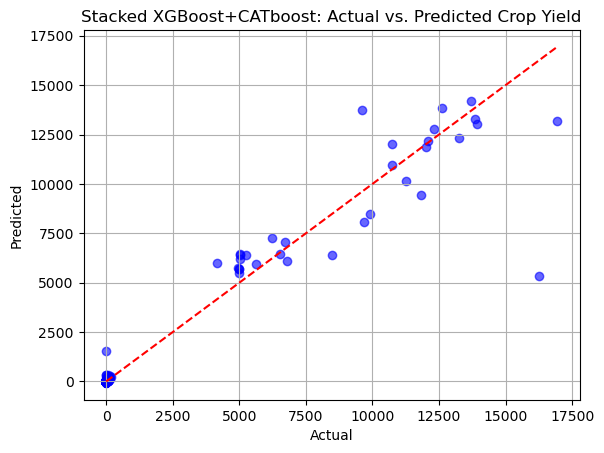

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacked XGBoost+CATboost: Actual vs. Predicted Crop Yield')
plt.grid(True)
plt.show()


In [27]:
import joblib

joblib.dump(stacked_model,'xgb_crop_model.pkl')

joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [28]:
import joblib
import os

os.makedirs('xgb', exist_ok=True)

for col, le in label_encoders.items():
    joblib.dump(le, f'xgb/{col}_encoder.pkl')


In [29]:
import joblib
from sklearn.preprocessing import LabelEncoder

crop_list = [ "Arecanut", "Arhar/Tur", "Bajra", "Banana", "Barley", "Black pepper", "Cardamom", "Cashewnut", 
              "Castor seed", "Coconut", "Coriander", "Cotton(lint)", "Cowpea(Lobia)", "Dry chillies", "Garlic",
              "Ginger", "Gram", "Groundnut", "Guar seed", "Horse-gram", "Jowar", "Jute", "Khesari", "Linseed",
              "Maize", "Masoor", "Mesta", "Moong(Green Gram)", "Moth", "Niger seed", "Oilseeds total", "Onion",
              "Other  Rabi pulses", "Other Cereals", "Other Kharif pulses", "Other Summer Pulses",
              "Peas & beans (Pulses)", "Potato", "Ragi", "Rapeseed &Mustard", "Rice", "Safflower", "Sannhamp",
              "Sesamum", "Small millets", "Soyabean", "Sugarcane", "Sunflower", "Sweet potato", "Tapioca",
              "Tobacco", "Turmeric", "Urad", "Wheat", "other oilseeds" ]

season_list = ["Autumn", "Kharif", "Rabi", "Summer", "Whole Year", "Winter"]

state_list = [ "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Delhi", "Goa", "Gujarat",
               "Haryana", "Himachal Pradesh", "Jammu and Kashmir", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh",
               "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Puducherry", "Punjab",
               "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal" ]

crop_encoder = LabelEncoder()
season_encoder = LabelEncoder()
state_encoder = LabelEncoder()


crop_encoder.fit(crop_list)
season_encoder.fit(season_list)
state_encoder.fit(state_list)

joblib.dump(crop_encoder,'Crop_encoder.pkl')
joblib.dump(season_encoder, 'Season_encoder.pkl')
joblib.dump(state_encoder,'State_encoder.pkl')

print("Encoders saved successfully.")


Encoders saved successfully.
